In [1]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np
from IPython.display import HTML


# Problem Parameters
a = -1.
b = 1.


def f(x):
    return np.cos((2 * np.pi * x / (b - a)) ** 2) * 2 * np.pi * x / (b - a)

In [2]:
# Parameters
d = 1
k = 1
inner_levels = 4
outer_levels = 1
start_ncentres = 3
start_delta = 1.

# Computed parameters
phi = rad.Wendland(d, k)
centre_thinning = 3. ** np.arange(0, inner_levels)
delta_thinning = 2. ** np.arange(0, inner_levels)
centres = [np.arange(a, b + inc, inc) for inc in (b - a) / (centre_thinning * start_ncentres)]
delta = start_delta / delta_thinning

# Integration
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
solver = rad.solve.MultilevelSolver(phi, centres, delta, rad.solve.InterpolationSolver, outer=outer_levels)
approx = solver.solve(f)
error = rad.error(f, approx, error_integrator)

print("L2 Relative Error:", error)
# print("Condition Numbers:", solver.cond())

L2 Relative Error: 0.0034626979909092724


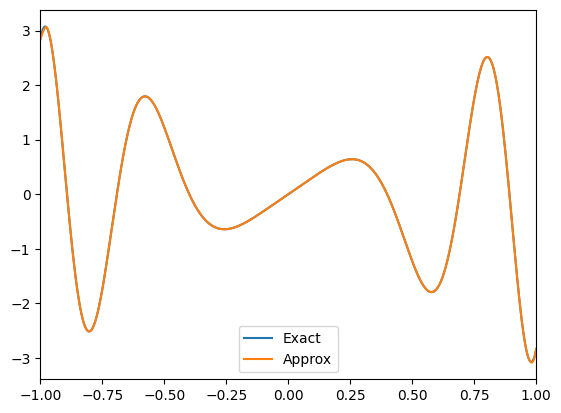

In [3]:
rad.plot.many(a, b, f, approx, n=5000, labels=["Exact", "Approx"])

In [5]:
anim = rad.animate.ml_animate(a, b, f, approx)
HTML(anim.to_jshtml())

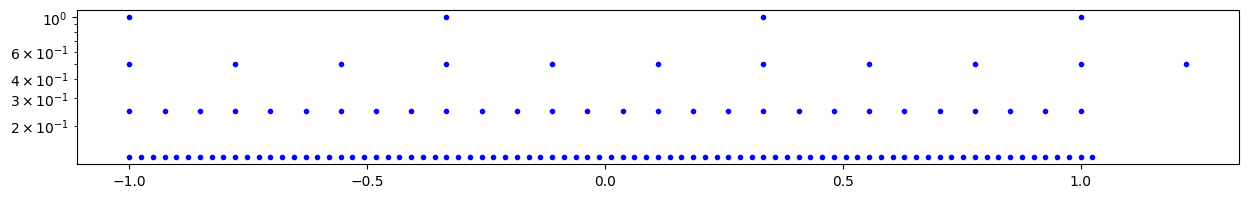

In [6]:
rad.plot.thinning(centres, delta, figsize=(15, 2))